In this data challenge, I'll be looking at data from different grocery stores, here's a small prompt: 'Imagine you were a data scientist working for a large supermarket chain and were given this dataset. Obviously you will need to initially explore and visualize the data, but ultimately try to find *actionable* insights rather than "interesting" findings'. 

Thus I'll need to look for <i><strong>actionable insights </strong></i> from the data that I'll work with.

In [1]:
import numpy as np#Math library
import pandas as pd#Table library
import matplotlib.pyplot as plt#Plotting library
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import warnings
import seaborn as sns#Plotting library
warnings.filterwarnings('ignore')#Gets rid of popup warnings
%matplotlib nbagg

## Exploring the Data Structure 

There are a lot of aspects of data that can limit our analysis. In this section I'll check that the rows are unique, the data types of the table, its completeness (eg. missing data), and finally a summary of the descriptive statistics to see if there are any anomalies that pop out.

In [2]:
#Load data
raw_data= pd.read_csv('supermarket_data_aggr.csv')
raw_data.head(3)

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090.0,473.0,7551.701,14.221659,3.150493,2.0,...,10.441143,14.862848,0.000000,0.0,0.000000,6.393403,2.600485,0.000000,0.0,0.000000
1,2,909.76764,254.94832,2295.4840,4508.0,486.0,7820.219,11.235947,2.191422,4.0,...,3.761943,4.848720,2.546600,0.0,16.479185,2.851152,2.009863,2.059450,0.0,2.103394
2,3,1498.94700,754.29560,2831.7727,814.0,234.0,1788.613,5.453088,2.258994,4.0,...,3.757062,5.605183,1.923385,0.0,5.924268,3.426687,2.478529,1.923385,0.0,1.947067


In [3]:
#Let's validate that the rows are unique 
print 'Total rows: ', len(raw_data['customer_id']), 'Unique rows: ', len(raw_data['customer_id'].unique())

Total rows:  60366 Unique rows:  60366


In [4]:
#Let's see all the columns and their types
raw_data.dtypes

customer_id                           int64
avg_distance_to_shops               float64
min_distance_to_shops               float64
max_distance_to_shops               float64
products_purchased                  float64
unique_products_purchased           float64
amount_purchased                    float64
avg_purchase                        float64
avg_price                           float64
shops_used                          float64
distance_shop_1                     float64
distance_shop_2                     float64
distance_shop_3                     float64
distance_shop_4                     float64
distance_shop_5                     float64
products_purchased_shop_1             int64
products_purchased_shop_2             int64
products_purchased_shop_3             int64
products_purchased_shop_4             int64
products_purchased_shop_5             int64
unique_products_purchased_shop_1      int64
unique_products_purchased_shop_2      int64
unique_products_purchased_shop_3

Great, they're all numeric so sklearn should be able to handle it. Now let's see what the statistics look like for each column to see if anything fishy/interesting pops out.

In [5]:
raw_data.describe()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
count,60366.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,...,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000
mean,30183.500000,2030.227290,1396.438077,2942.667579,1778.712383,330.668185,4235.493251,8.532106,3.666521,2.380055,...,8.099084,4.974362,1.520414,0.757002,0.808136,4.681516,2.297958,0.760319,0.444549,0.453596
std,17426.307512,1119.909710,1048.415728,1327.528871,2185.051073,236.004343,5006.777082,10.315527,9.133248,1.012191,...,16.535203,11.230346,3.687745,4.902861,2.603233,15.956085,9.966453,1.897947,4.385982,1.325875
min,1.000000,6.642472,6.642472,6.642472,1.000000,1.000000,0.212000,0.212000,0.212000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15092.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.852688,0.000000,0.000000,0.000000,0.000000,2.647570,0.000000,0.000000,0.000000,0.000000
50%,30183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.048320,3.209491,0.000000,0.000000,0.000000,3.251844,2.296758,0.000000,0.000000,0.000000
75%,45274.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.407107,5.978663,2.107243,0.000000,0.000000,4.166946,2.717513,1.840338,0.000000,0.000000
max,60366.000000,9004.164000,9004.164000,9267.698000,22131.000000,1465.000000,51588.656000,787.569000,787.569000,5.000000,...,787.569000,787.569000,263.234000,522.607000,133.967250,787.569000,787.569000,263.234000,522.607000,133.967250


This looks great for the most part. However, there are NaN values for some of our calculations for our intervals. From my experience, this means that we must have some nulls/nans/infinite values in there. This could be bad since the sklearn ML package won't be able to handle them. Let's check if there are any so we can clean it up all now and not later. 

The following cell will print out the percentage of nans and infinite cells per column.

In [6]:
#Now let's find how many of these columns are nulls and infinites, that should tell us their utility if we choose to use them
#List of columns
features= raw_data.columns 

#Now let's print out the percentage of nans and inf values for each column (nan, inf)
print 'Percentage of nulls, Percentage of infinte values'
for i in features: #Iterate through column and count nulls, then divide by total rows
    print 100-(raw_data[i].isnull().sum()/float(len(raw_data))), 100-(sum(np.isfinite(raw_data[i])/float(len(raw_data))))

Percentage of nulls, Percentage of infinte values
100.0 99.0
99.9999834344 99.0000165656
99.9999834344 99.0000165656
99.9999834344 99.0000165656
99.9999834344 99.0000165656
99.9999834344 99.0000165656
99.9999834344 99.0000165656
99.9999834344 99.0000165656
99.9999834344 99.0000165656
99.9999834344 99.0000165656
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0
100.0 99.0


In [7]:
#Ok they're good for the most part but all of them have at least one nan or inf so let's
#first convert inf's to nans and then change the nans to means. Then check describe again.
#Make a copy of dataset to apply operations
cleanData= raw_data.copy()

#Replace infs with nans
cleanData= cleanData.replace([np.inf, -(np.inf)], np.nan)

#Replace nans with mean value for that column
cleanData= cleanData.fillna(cleanData.mean())

In [8]:
cleanData.describe()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
count,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,...,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000
mean,30183.500000,2030.227290,1396.438077,2942.667579,1778.712383,330.668185,4235.493251,8.532106,3.666521,2.380055,...,8.099084,4.974362,1.520414,0.757002,0.808136,4.681516,2.297958,0.760319,0.444549,0.453596
std,17426.307512,1119.900434,1048.407044,1327.517875,2185.032974,236.002388,5006.735611,10.315442,9.133173,1.012183,...,16.535203,11.230346,3.687745,4.902861,2.603233,15.956085,9.966453,1.897947,4.385982,1.325875
min,1.000000,6.642472,6.642472,6.642472,1.000000,1.000000,0.212000,0.212000,0.212000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15092.250000,1250.240650,573.610700,2117.216650,227.000000,127.000000,653.117750,4.532909,2.533755,2.000000,...,3.852688,0.000000,0.000000,0.000000,0.000000,2.647570,0.000000,0.000000,0.000000,0.000000
50%,30183.500000,1936.890050,1184.943000,2869.195300,925.000000,304.000000,2355.147500,6.862961,2.944268,2.000000,...,6.048320,3.209491,0.000000,0.000000,0.000000,3.251844,2.296758,0.000000,0.000000,0.000000
75%,45274.750000,2569.706800,1962.384500,3580.669700,2551.750000,500.000000,6054.458750,10.429527,3.558222,3.000000,...,9.407107,5.978663,2.107243,0.000000,0.000000,4.166946,2.717513,1.840338,0.000000,0.000000
max,60366.000000,9004.164000,9004.164000,9267.698000,22131.000000,1465.000000,51588.656000,787.569000,787.569000,5.000000,...,787.569000,787.569000,263.234000,522.607000,133.967250,787.569000,787.569000,263.234000,522.607000,133.967250


Sweet problem gone! Our data is now ready for any machine learning we may like to do on it :)

## Splitting Data 

The first thing that I'll want to do is identify some type of target variable. The most obvious one seems to be 'amount_purchased'. We'll keep this column separate from the others and keep the customer id separate as well. 

To begin with we'll need to split our data into a few groups: training, testing sets. From the training we'll then split that into a training and validation set.

In [9]:
from sklearn.cross_validation import KFold, train_test_split

In [10]:
#Now we'll split our data first into training/testing (wel'll further divide testing into validation, real test)
#random_state sets seed
train, validTest= train_test_split(cleanData, test_size= 0.5, random_state= 42)

In [11]:
#Now split the validTest into a test dataset and a validation set (in half again)
test, validation= train_test_split(validTest, test_size= 0.5, random_state= 42)

Now that we have this taken care of, we can do visualization and any other transformations on the training set without worrying about having observed some of our test/validation set (in case it poisons our analysis in any way).

## Visualizing Data

Let's first look at how far customers have to travel to reach the different shops. Then, we'll determine how distance affects customers spending habits at each store.

In [12]:
#Let's remember what our dataset holds
train.head(3)

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
38277,38278,1525.1019,442.54196,2862.7542,379.0,172.0,861.156,3.844446,2.440040,4.0,...,4.413072,3.597323,2.011222,0.0,2.018571,2.627198,2.300221,2.011222,0.0,1.953619
2842,2843,3009.2363,3009.23630,3009.2363,1.0,1.0,2.312,2.312000,2.312000,1.0,...,2.312000,0.000000,0.000000,0.0,0.000000,2.312000,0.000000,0.000000,0.0,0.000000
21266,21267,2128.2830,2128.28300,2128.2830,86.0,69.0,937.066,13.580667,12.438464,1.0,...,13.580667,0.000000,0.000000,0.0,0.000000,12.438464,0.000000,0.000000,0.0,0.000000


<IPython.core.display.Javascript object>


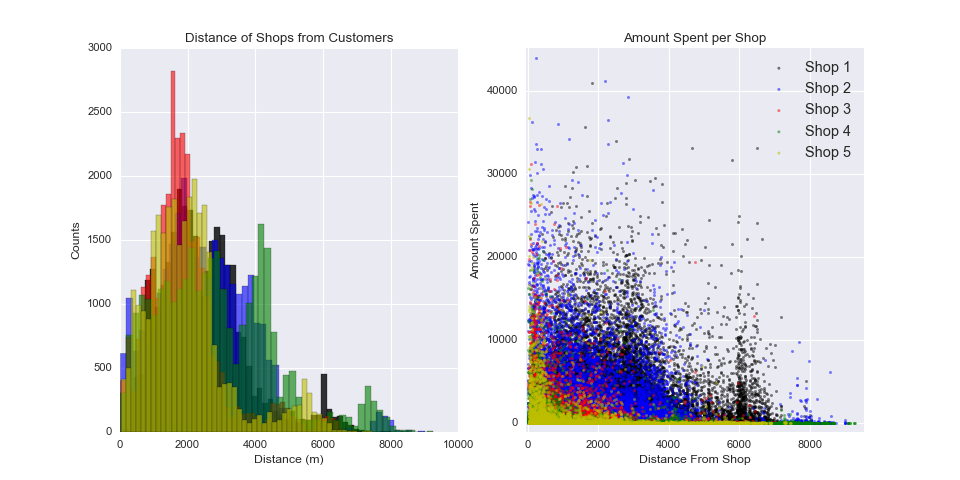

In [13]:
#Now I'll plot two figures. The first is a histogram of the distances of the customers from each store.

bins= 50
distances= ['Shop 1', 'Shop 2', 'Shop 3', 'Shop 4', 'Shop 5']

figure, ax = plt.subplots(1,2, figsize=(12,6))#Set figure sizes

plt.subplot(1,2,1)
plt.hist(train['distance_shop_1'], bins= bins, color= 'k', alpha= 0.8)
plt.hist(train['distance_shop_2'], bins= bins, color= 'b', alpha= 0.6)
plt.hist(train['distance_shop_3'], bins= bins, color= 'r', alpha= 0.6)
plt.hist(train['distance_shop_4'], bins= bins, color= 'g', alpha= 0.6)
plt.hist(train['distance_shop_5'], bins= bins, color= 'y', alpha= 0.6)
#plt.legend([[train['distance_shop_1'],train['distance_shop_2'], train['distance_shop_3']],
           #train['distance_shop_4'], train['distance_shop_5']],  ['Logistic Regression Model','Random Forest Model', 'Random Guess', 'a', 'b'], loc=4, fontsize= 13)
plt.title('Distance of Shops from Customers')
plt.xlabel('Distance (m)')
plt.ylabel('Counts')

plt.subplot(1,2,2)
shop1scatter= plt.scatter(train['distance_shop_1'], train['amount_purchased_shop_1'], marker= '.', color= 'k', alpha= 0.5, label= 'Shop 1')
shop2scatter= plt.scatter(train['distance_shop_2'], train['amount_purchased_shop_2'], marker= '.', color= 'b', alpha= 0.5, label= 'Shop 2')
shop3scatter= plt.scatter(train['distance_shop_3'], train['amount_purchased_shop_3'], marker= '.', color= 'r', alpha= 0.5, label= 'Shop 3')
shop4scatter= plt.scatter(train['distance_shop_4'], train['amount_purchased_shop_4'], marker= '.', color= 'g', alpha= 0.5, label= 'Shop 4')
shop5scatter= plt.scatter(train['distance_shop_5'], train['amount_purchased_shop_5'], marker= '.', color= 'y', alpha= 0.5, label= 'Shop 5')
plt.title('Amount Spent per Shop')
plt.xlabel('Distance From Shop')
plt.ylabel('Amount Spent')
plt.legend(handles=[shop1scatter, shop2scatter, shop3scatter, shop4scatter, shop5scatter], fontsize= 13)

The shops all have customers visiting from roughly the same distances (left), though some shops (green, shop 4) have customers coming from longer distances. On the right scatterplot we can see that shop1 (black), and 2 (blue) are really the only shops that have customers who spend more than 5,000 euros past 5,000 m from their homes. Since these are not density plots, it's hard to determine if this also corresponds to higher density of sales (they could have hte same number of sales but at different distances). Let's find this info by comparing total sales and items sold per shop.

### Understanding sales by shops

In [14]:
#Now let's calculate total sale amount, and volume for each shop

sumShop1= train['amount_purchased_shop_1'].sum()
sumShop2= train['amount_purchased_shop_2'].sum()
sumShop3= train['amount_purchased_shop_3'].sum()
sumShop4= train['amount_purchased_shop_4'].sum()
sumShop5= train['amount_purchased_shop_5'].sum()

itemsShop1= train['products_purchased_shop_1'].sum()
itemsShop2= train['products_purchased_shop_2'].sum()
itemsShop3= train['products_purchased_shop_3'].sum()
itemsShop4= train['products_purchased_shop_4'].sum()
itemsShop5= train['products_purchased_shop_5'].sum()

print 'Sum shop 1 (thousands of Euros): ', sumShop1/1000, 'Items (thousands): ', itemsShop1/1000 
print 'Sum shop 2: ',sumShop2/1000, 'Items: ', itemsShop2/1000   
print 'Sum shop 3: ',sumShop3/1000, 'Items: ', itemsShop3/1000   
print 'Sum shop 4: ',sumShop4/1000, 'Items: ', itemsShop4/1000   
print 'Sum shop 5: ',sumShop5/1000, 'Items: ', itemsShop5/1000  

Sum shop 1 (thousands of Euros):  69547.185076 Items (thousands):  26730
Sum shop 2:  41725.9811798 Items:  18342
Sum shop 3:  8911.3431735 Items:  4607
Sum shop 4:  3362.82513986 Items:  1726
Sum shop 5:  4258.89930268 Items:  2233


Wow, so Shop1 and 2 have much larger total sales but they also happen to have the largest number of total items sold!

My intuition would suggest that this could be because shop1 and 2 are large retailers with general items being sold, while shop 3-5 could be specialized. If we decide to calculate the average spent per item, we can try to determine what type of items they sell at each shop. 

In [15]:
avgpriceShop1= train['avg_price_shop_1'].mean()
avgpriceShop2= train['avg_price_shop_2'].mean()
avgpriceShop3= train['avg_price_shop_3'].mean()
avgpriceShop4= train['avg_price_shop_4'].mean()
avgpriceShop5= train['avg_price_shop_5'].mean()

print 'Average item price (euro) for shops 1,2,3,4,5: ', avgpriceShop1, avgpriceShop2, avgpriceShop3, avgpriceShop4, avgpriceShop5

Average item price (euro) for shops 1,2,3,4,5:  4.77084071458 2.3672966714 0.763742274432 0.419780972926 0.446799707655


So shops 3-5 have very small purchases that occur there (under a Euro), while shops 1 and 2 sell items at least 3-10 times the price of 3,4, and 5. Let's see if there are additional correlations between our features. So it seems apparent that 1-2 are large retailers that also have more expensive items. If stores 3-5 wanted to improve amount_spent by all customers, what features would they have to focus on? Let's try looking at the features that have strong correlations with amount_purchased (row index 6).

In [16]:
corrTable= train.corr()
plt.imshow(corrTable, interpolation='nearest', cmap='viridis')
plt.colorbar(label='Correlation of Features')

## Predicting Amounts Purchased

From the persepective of the company, the target variable would be the amounts_purchased. Let's see if we can visualize how the other variables compare to it. 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

#We'll first normalize our training data, create a random forest object and finally fit it with a random forest classifier
#trainNormX= preprocessing.normalize(train.ix[:, train.columns != 'amount_purchased'])
trainNormX= train.drop('customer_id',1)

trainY= trainNormX['amount_purchased']

#print type(trainNormX), type(trainY)
forestModel= RandomForestClassifier(n_estimators= 100, random_state= 42)#Include all four features
forestModel.fit(trainNormX.ix[:, trainNormX.columns != 'amount_purchased'], trainY)

ValueError: Unknown label type: array([[  8.61156000e+02],
       [  2.31200000e+00],
       [  9.37066000e+02],
       ..., 
       [  4.41574800e+03],
       [  2.77280000e+01],
       [  1.05267300e+03]])

Don't understand error (I've been able to do this before just fine). You can see that it's having trouble cause the elements inside are arrays, not values.  Tried converting trainY to np.array but I get the same error. Changing the dimensions also gives the same problems. Wasted too much time troubleshooting this, next item on list of priorities.